### <center> **Análise Preditiva:** gênero

**Objetivo:** Preve o gênero que será mais ouvido ao final do ano baseado no histórico do usuário

In [46]:
# Importações
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [41]:
# Lê o csv com o gênero das músicas
df = pd.read_csv('spotify_songs_sofia.csv')

### Compreensão dos Dados

In [26]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25997 entries, 0 to 25996
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 25997 non-null  object 
 1   platform                           25997 non-null  object 
 2   ms_played                          25997 non-null  int64  
 3   conn_country                       25997 non-null  object 
 4   ip_addr                            25997 non-null  object 
 5   master_metadata_track_name         25997 non-null  object 
 6   master_metadata_album_artist_name  25997 non-null  object 
 7   master_metadata_album_album_name   25965 non-null  object 
 8   spotify_track_uri                  25997 non-null  object 
 9   episode_name                       0 non-null      float64
 10  episode_show_name                  0 non-null      float64
 11  spotify_episode_uri                0 non-null      flo

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,genero
0,2023-04-04 18:25:30+00:00,android,11451,BR,177.76.148.44,Talk that Talk,TWICE,BETWEEN 1&2,spotify:track:0RDqNCRBGrSegk16Avfzuq,NaN,...,NaN,NaN,playbtn,endplay,False,True,False,1680632717,False,k-pop
1,2023-04-04 18:25:47+00:00,android,16559,BR,177.76.148.44,There's Nothing Holdin' Me Back,Shawn Mendes,Illuminate,spotify:track:7JJmb5XwzOO8jgpou264Ml,NaN,...,NaN,NaN,playbtn,endplay,False,True,False,1680632730,False,pop
2,2023-04-04 18:25:55+00:00,android,4168,BR,177.76.148.44,Woman,Doja Cat,Planet Her,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,NaN,...,NaN,NaN,playbtn,endplay,False,True,False,1680632747,False,pop
3,2023-04-04 19:23:17+00:00,android,80840,BR,177.76.148.44,FLOWER,JISOO,ME,spotify:track:69CrOS7vEHIrhC2ILyEi0s,NaN,...,NaN,NaN,clickrow,logout,False,False,False,1680635513,False,k-pop
4,2023-04-04 22:51:39+00:00,android,67760,BR,201.42.207.140,FLOWER,JISOO,ME,spotify:track:69CrOS7vEHIrhC2ILyEi0s,NaN,...,NaN,NaN,appload,logout,False,False,False,1680647986,False,k-pop


### Preparação dos Dados

In [27]:
# COlunas necessárias: ts, ms_played, master_metadata_album_artist_name, shuffle, skipped, genero

# Copiando os dados para outro df
df_genre = df.copy()

# Excluindo colunas desnecessárias
df_genre = df_genre.drop(columns=['platform', 'conn_country', 'ip_addr', 'master_metadata_track_name', 'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name', 'episode_show_name', 'spotify_episode_uri', 'audiobook_uri', 'audiobook_title', 'audiobook_chapter_uri', 'audiobook_chapter_title', 'reason_start', 'reason_end', 'offline', 'offline_timestamp', 'incognito_mode'])

# df limpo
display(df_genre.head())

,ts,ms_played,master_metadata_album_artist_name,shuffle,skipped,genero
0,2023-04-04 18:25:30+00:00,11451,TWICE,False,True,k-pop
1,2023-04-04 18:25:47+00:00,16559,Shawn Mendes,False,True,pop
2,2023-04-04 18:25:55+00:00,4168,Doja Cat,False,True,pop
3,2023-04-04 19:23:17+00:00,80840,JISOO,False,False,k-pop
4,2023-04-04 22:51:39+00:00,67760,JISOO,False,False,k-pop


In [28]:
# (ideia) apagar do df as músicas que foram puladas e estavam no modo aleatório
df_genre.drop(
    df_genre[(df_genre['shuffle'] == True) & (df_genre['skipped'] == True)].index, 
    inplace=True)

display(df_genre.head())

,ts,ms_played,master_metadata_album_artist_name,shuffle,skipped,genero
0,2023-04-04 18:25:30+00:00,11451,TWICE,False,True,k-pop
1,2023-04-04 18:25:47+00:00,16559,Shawn Mendes,False,True,pop
2,2023-04-04 18:25:55+00:00,4168,Doja Cat,False,True,pop
3,2023-04-04 19:23:17+00:00,80840,JISOO,False,False,k-pop
4,2023-04-04 22:51:39+00:00,67760,JISOO,False,False,k-pop


In [29]:
# Converter timestamp
df_genre['ts'] = pd.to_datetime(df['ts'])

# Criar colunas úteis
df_genre['ano'] = df_genre['ts'].dt.year
df_genre['mes'] = df_genre['ts'].dt.to_period('M')

# Converter ms_played → minutos
df_genre['min_played'] = df_genre['ms_played'] / 60000

display(df_genre)


C:\Users\sofiasantana-ieg\AppData\Local\Temp\ipykernel_28096\2075590818.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_genre['mes'] = df_genre['ts'].dt.to_period('M')


,ts,ms_played,master_metadata_album_artist_name,shuffle,skipped,genero,ano,mes,min_played
0,2023-04-04 18:25:30+00:00,11451,TWICE,False,True,k-pop,2023,2023-04,0.190850
1,2023-04-04 18:25:47+00:00,16559,Shawn Mendes,False,True,pop,2023,2023-04,0.275983
2,2023-04-04 18:25:55+00:00,4168,Doja Cat,False,True,pop,2023,2023-04,0.069467
3,2023-04-04 19:23:17+00:00,80840,JISOO,False,False,k-pop,2023,2023-04,1.347333
4,2023-04-04 22:51:39+00:00,67760,JISOO,False,False,k-pop,2023,2023-04,1.129333
...,...,...,...,...,...,...,...,...,...
25992,2026-01-29 22:55:17+00:00,122973,Mc Larissa,False,True,brega funk,2026,2026-01,2.049550
25993,2026-01-29 22:55:20+00:00,2639,DJ 7W,False,True,brazilian funk,2026,2026-01,0.043983
25994,2026-01-29 22:56:55+00:00,96005,MXZI,False,False,phonk,2026,2026-01,1.600083
25995,2026-01-29 22:57:07+00:00,9907,MC K.K,False,True,brazilian funk,2026,2026-01,0.165117


In [30]:
# Agregação mensal por gênero
df_month = (
    df_genre.groupby(['mes', 'genero'])
      .agg(
          plays=('genero', 'count'),
          total_min=('min_played', 'sum')
      )
      .reset_index()
)

display(df_month)

,mes,genero,plays,total_min
0,2023-04,Hip-Hop,1,2.297917
1,2023-04,art pop,1,4.909550
2,2023-04,axé,6,13.079250
3,2023-04,dark r&b,1,2.137717
4,2023-04,gospel,7,16.145933
...,...,...,...,...
1164,2026-01,soft pop,8,13.162950
1165,2026-01,speedcore,1,2.218900
1166,2026-01,stutter house,1,0.391350
1167,2026-01,synthpop,2,5.142750


In [31]:

# Pivotar (cada gênero vira coluna)
df_pivot = df_month.pivot(index='mes', columns='genero', values='total_min').fillna(0)

# Total geral por mês
df_pivot['total_geral'] = df_pivot.sum(axis=1)

# Porcentagem por gênero
for col in df_pivot.columns[:-1]:
    df_pivot[f'perc_{col}'] = df_pivot[col] / df_pivot['total_geral']

C:\Users\sofiasantana-ieg\AppData\Local\Temp\ipykernel_28096\3789473067.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot[f'perc_{col}'] = df_pivot[col] / df_pivot['total_geral']
C:\Users\sofiasantana-ieg\AppData\Local\Temp\ipykernel_28096\3789473067.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_pivot[f'perc_{col}'] = df_pivot[col] / df_pivot['total_geral']
C:\Users\sofiasantana-ieg\AppData\Local\Temp\ipykernel_28096\3789473067.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the res

In [32]:
display(df_pivot)

genero,60s,Absolute Bangers,Better than Nicki Minaj,Canadian,Chill House,Eurovision,FNAF,Garantido,Hip-Hop,House,...,perc_trap,perc_trap funk,perc_trap soul,perc_trip-hop,perc_tropical house,perc_turkish pop,perc_uk garage,perc_witch house,perc_yacht rock,perc_zouk
mes,,,,,,,,,,,,,,,,,,,,,
2023-04,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.297917,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.008359,0.000000,0.000000,0.000000,0.000000
2023-05,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.838900,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,26.903717,0.000000,...,0.000152,0.000000,0.000307,0.000000,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000
2023-07,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,12.480100,0.000000,...,0.018694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.117567,0.000000,...,0.007030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-09,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-10,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-11,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
# Pega apenas colunas que NÃO começam com 'perc_' 
# e NÃO sejam 'total_geral'
colunas_genero = [
    col for col in df_pivot.columns 
    if col != 'total_geral' and not col.startswith('perc_')
]
y = df_pivot[colunas_genero].idxmax(axis=1)

# lag feature (evitar vazamento temporal)
X = df_pivot.shift(1).dropna()
y = y.loc[X.index]

### Treino e Teste

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

### Modelo

In [35]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=200
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Resultado do Modelo (Previsão)

In [36]:
previsao_final = model.predict(X.tail(1))
print("Gênero previsto:", previsao_final[0])

Gênero previsto: k-pop


### Avaliação

In [39]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(cm)

                precision    recall  f1-score   support

brazilian funk       0.00      0.00      0.00         2
         k-pop       0.43      1.00      0.60         3
           pop       0.00      0.00      0.00         2

      accuracy                           0.43         7
     macro avg       0.14      0.33      0.20         7
  weighted avg       0.18      0.43      0.26         7

Matriz de Confusão:
[[0 2 0]
 [0 3 0]
 [0 2 0]]


C:\Users\sofiasantana-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sofiasantana-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sofiasantana-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

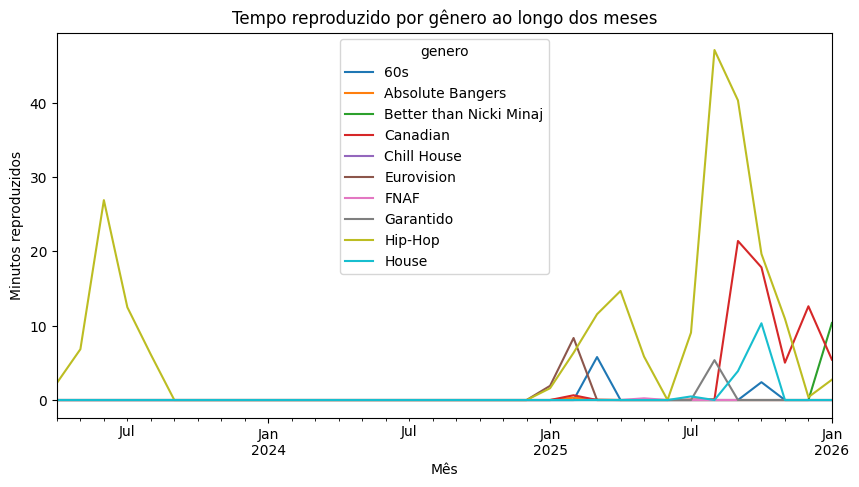

In [40]:
df_pivot[df_pivot.columns[:10]].plot(figsize=(10,5))
# df_pivot[df_pivot.columns].plot(figsize=(10,5))
plt.title("Tempo reproduzido por gênero ao longo dos meses")
plt.ylabel("Minutos reproduzidos")
plt.xlabel("Mês")
plt.show()